In [38]:
import pandas as pd 
import numpy as np 

reviews = pd.read_csv("/Users/abhinav/Documents/AI and Society Project/AirBNB_London_Analysis/data/reviews_clean.csv")
print(reviews.info())
print(reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097996 entries, 0 to 2097995
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   listing_id     int64 
 2   id             int64 
 3   date           object
 4   reviewer_id    int64 
 5   reviewer_name  object
 6   comments       object
 7   text           object
dtypes: int64(4), object(4)
memory usage: 128.1+ MB
None
         Unnamed: 0    listing_id            id   reviewer_id
count  2.097996e+06  2.097996e+06  2.097996e+06  2.097996e+06
mean   1.048998e+06  3.572207e+17  7.776855e+17  1.968301e+08
std    6.056394e+05  4.905399e+17  5.533266e+17  1.875552e+08
min    0.000000e+00  1.391300e+04  2.103200e+04  4.400000e+01
25%    5.244988e+05  1.581313e+07  5.707448e+08  4.043916e+07
50%    1.048998e+06  3.798997e+07  9.259551e+17  1.279123e+08
75%    1.573496e+06  8.332622e+17  1.261510e+18  3.257543e+08
max    2.097995e+06  1.508900e+18  1.512348e+18  7.188301e+08


In [39]:
reviews.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,text
0,0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known Alina took leap faith r...
1,1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,Alina really good host flat clean tidy really ...
2,2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,Alina amazing host made feel right home like h...
3,3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",Alinas place nice room big clean bed huge Alin...
4,4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",Nice location Islington area good short busine...


In [40]:
users = reviews['id'].unique()
listings_id = reviews['listing_id'].unique()
print(f'We have {len(users)} unique users.')
print(f'We have {len(reviews)} total reviews.')
print(f'We have {len(listings_id)} listings considered.')

We have 2097996 unique users.
We have 2097996 total reviews.
We have 72749 listings considered.


In [41]:
numbers_reviews = reviews.groupby("listing_id").size().reset_index(name="num_reviews")

In [42]:
print(f"There are approx. {float(numbers_reviews['num_reviews'].median())} per listing, with an average of {float(numbers_reviews['num_reviews'].mean())}.")

There are approx. 10.0 per listing, with an average of 28.838829399716836.


In [43]:
listings = pd.read_csv("/Users/abhinav/Documents/AI and Society Project/AirBNB_London_Analysis/data/listings.csv")
print(listings.info())
print(listings.describe())
print(listings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96871 entries, 0 to 96870
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96871 non-null  int64  
 1   listing_url                                   96871 non-null  object 
 2   scrape_id                                     96871 non-null  int64  
 3   last_scraped                                  96871 non-null  object 
 4   source                                        96871 non-null  object 
 5   name                                          96871 non-null  object 
 6   description                                   94421 non-null  object 
 7   neighborhood_overview                         41208 non-null  object 
 8   picture_url                                   96865 non-null  object 
 9   host_id                                       96871 non-null 

In [44]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [45]:
notes = reviews.merge(listings, left_on = 'listing_id', right_on="id")

notes.head()

,Unnamed: 0,listing_id,id_x,date,reviewer_id,reviewer_name,comments,text,id_y,listing_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known Alina took leap faith r...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
1,1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,Alina really good host flat clean tidy really ...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
2,2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,Alina amazing host made feel right home like h...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
3,3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",Alinas place nice room big clean bed huge Alin...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3
4,4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",Nice location Islington area good short busine...,13913,https://www.airbnb.com/rooms/13913,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.3


In [46]:
import matplotlib.pyplot as plt

def distribution(df, col, bins=30, kde=False):

    data = df[col].dropna()
    
    plt.figure()
    plt.hist(data, bins=bins, density=kde)
    
    if kde:
        from scipy.stats import gaussian_kde
        import numpy as np
        x = np.linspace(data.min(), data.max(), 500)
        kde_curve = gaussian_kde(data)
        plt.plot(x, kde_curve(x))
    
    plt.xlabel(col)
    plt.ylabel("Density" if kde else "Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


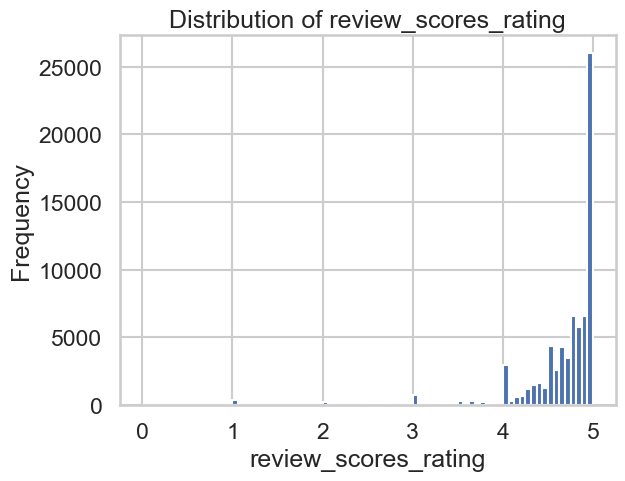

In [47]:
distribution(listings, "review_scores_rating", bins = 80)

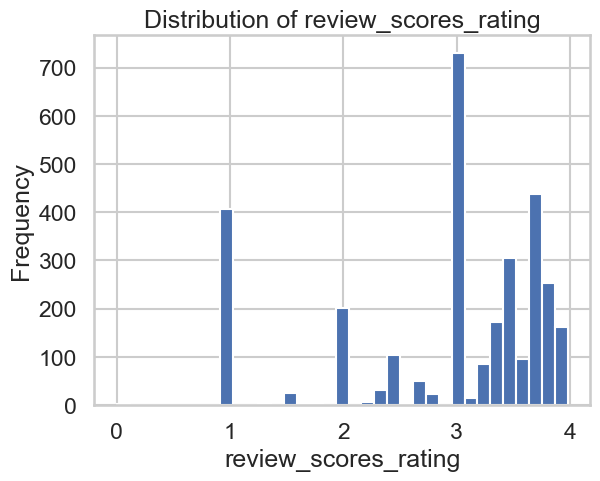

We will be working with 3115 listings for negative and 69634 for positive listings.


In [48]:
# Our focus group
distribution(listings[listings['review_scores_rating'] < 4], "review_scores_rating", bins = 35)
print(
    f"We will be working with {len(listings[listings['review_scores_rating'] < 4])} "
    f"listings for negative and "
    f"{len(listings[listings['review_scores_rating'] >= 4])} for positive listings."
)


In [49]:
rev = [r for r in notes.columns if "scores" in r] 
scores = notes[['listing_id'] + rev]
scores.head()

,listing_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
1,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
2,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
3,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78
4,13913,4.85,4.8,4.8,4.81,4.87,4.78,4.78


In [50]:
scores.describe()

,listing_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.097996e+06,2.097996e+06,2.097981e+06,2.097987e+06,2.097953e+06,2.097976e+06,2.097952e+06,2.097952e+06
mean,3.572207e+17,4.752628e+00,4.798412e+00,4.733451e+00,4.855227e+00,4.872123e+00,4.774762e+00,4.695028e+00
std,4.905399e+17,2.293123e-01,2.037208e-01,2.540624e-01,1.723847e-01,1.684781e-01,1.992023e-01,2.295603e-01
min,1.391300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.581313e+07,4.660000e+00,4.730000e+00,4.630000e+00,4.810000e+00,4.830000e+00,4.690000e+00,4.590000e+00
50%,3.798997e+07,4.810000e+00,4.850000e+00,4.800000e+00,4.900000e+00,4.920000e+00,4.820000e+00,4.740000e+00
75%,8.332622e+17,4.910000e+00,4.930000e+00,4.910000e+00,4.960000e+00,4.970000e+00,4.910000e+00,4.850000e+00
max,1.508900e+18,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


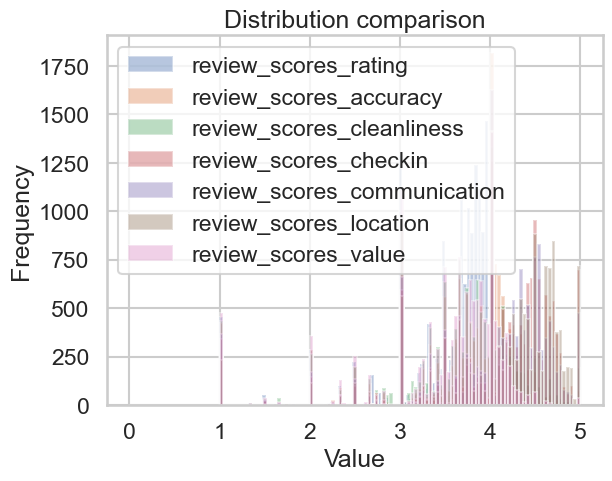

In [51]:
import matplotlib.pyplot as plt

plt.figure()
scores_neg = scores[scores['review_scores_rating'] < 4]
for r in rev:
    data = scores_neg[r].dropna()
    plt.hist(data, bins=100, alpha=0.4, label=r)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution comparison")
plt.legend()
plt.show()


In [52]:
len(scores[scores['review_scores_checkin'] == 1])

357

In [53]:
def l(text):
    if isinstance(text, str):
        return len(text)
    return 0

notes['len_text'] = notes['text'].apply(l)
empties = notes[notes['len_text'] == 0]

In [54]:
print(f"There are {len(notes[notes['len_text'] == 0])} empty reviews, out of which {len(empties[empties['review_scores_rating'] < 4])} are \"negative\".")

There are 4438 empty reviews, out of which 88 are "negative".


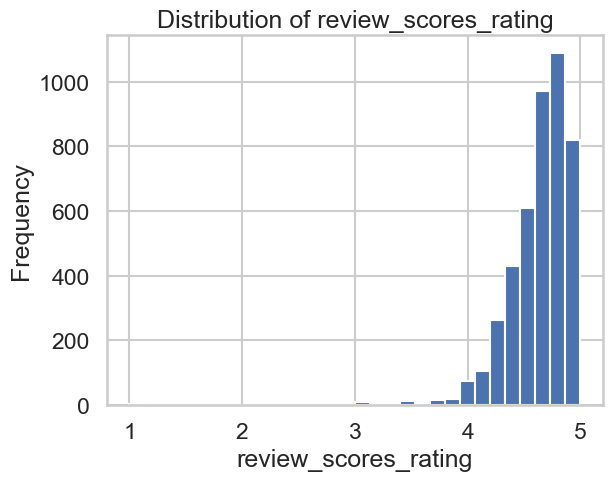

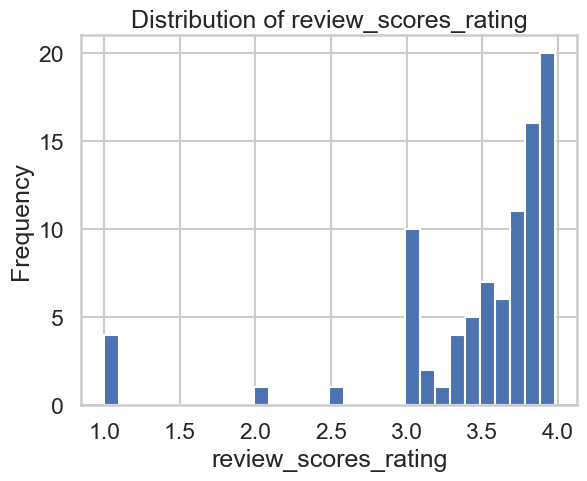

In [55]:

empties['review_scores_rating']
distribution(empties, 'review_scores_rating', bins = 30)
distribution(empties[empties['review_scores_rating'] < 4], 'review_scores_rating', bins = 30)


In [56]:
def avg(row):
    return np.mean(row)

score_cols = [c for c in notes.columns if "scores" in c]

# notes["review"] = notes[score_cols].apply(avg, axis=1)
# scores['review'] = scores[score_cols].apply(avg, axis = 1)

In [57]:
notes.to_csv("/Users/abhinav/Documents/AI and Society Project/AirBNB_London_Analysis/data/notes.csv")
scores.to_csv("/Users/abhinav/Documents/AI and Society Project/AirBNB_London_Analysis/data/scores.csv")

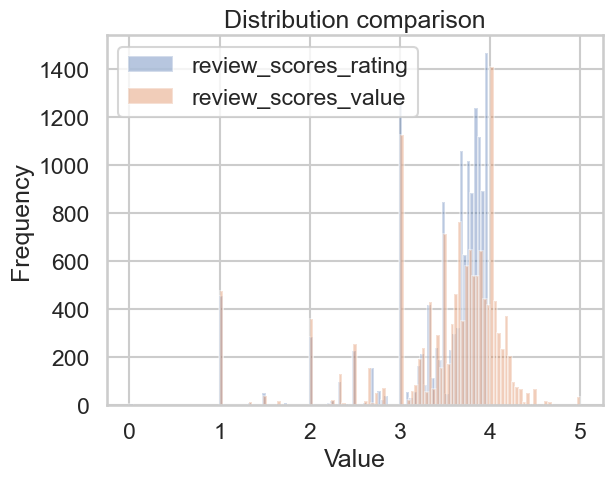

In [58]:
scores_neg = scores[scores['review_scores_rating'] < 4]
plt.figure()
for r in ['review_scores_rating', 'review_scores_value']:
    data = scores_neg[r].dropna()
    plt.hist(data, bins=100, alpha=0.4, label=r)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution comparison")
plt.legend()
plt.show()


In [59]:
notes.columns

Index(['Unnamed: 0', 'listing_id', 'id_x', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'text', 'id_y', 'listing_url', 'scrape_id',
       'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_

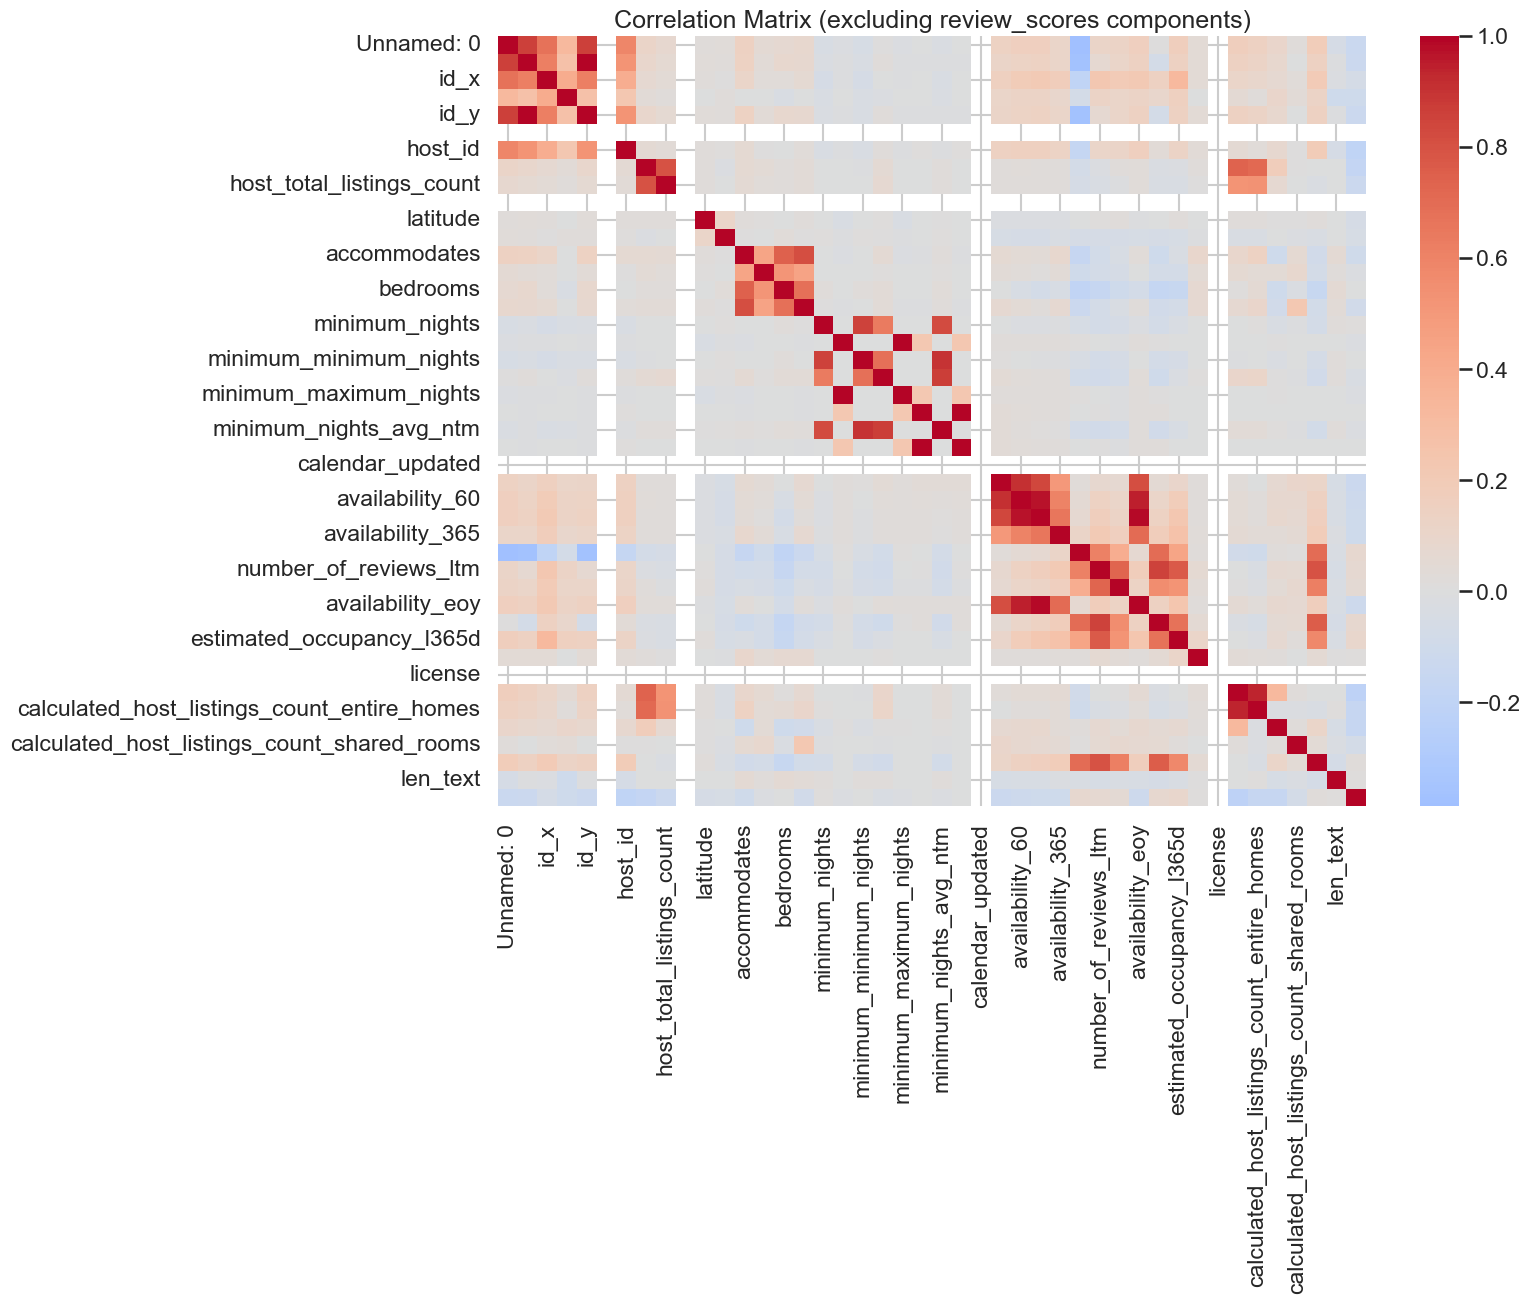

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
num_cols = notes.select_dtypes(include=["number"]).columns

# Ensure review exists
if "review" not in notes.columns:
	notes["review"] = notes[score_cols].mean(axis=1)

# Remove review score components to avoid circular correlation
exclude = [c for c in num_cols if "review_scores" in c]
if "review" in num_cols:
	exclude.append("review")  # we add it manually later

features = [c for c in num_cols if c not in exclude]

# Compute correlation with review
corr = notes[features + ["review"]].corr()

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (excluding review_scores components)")
plt.show()


In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk")

required_vars = ["listings", "reviews", "numbers_reviews", "scores", "notes"]
missing = [v for v in required_vars if v not in globals()]
if missing:
    raise RuntimeError(f" Missing variables: {missing}")

if "price_num" not in listings.columns:
    listings["price_num"] = pd.to_numeric(
        listings["price"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False),
        errors="coerce",
    )

rated = listings[listings["review_scores_rating"].notna()].copy()
rated["is_low"] = rated["review_scores_rating"] < 4.0
rated["is_top"] = rated["review_scores_rating"] >= 4.8
rated["rating_bucket"] = pd.cut(
    rated["review_scores_rating"],
    bins=[0, 4.0, 4.5, 4.8, 5.01],
    labels=["Low (<4.0)", "Mid (4.0-4.5)", "Good (4.5-4.8)", "Top (>=4.8)"],
    include_lowest=True,
    right=False,
)

overview = pd.DataFrame(
    {
        "metric": [
            "Rated listings",
            "Low-rated listings (<4.0)",
            "Top-rated listings (>=4.8)",
            "Median reviews/listing",
            "Mean reviews/listing",
        ],
        "value": [
            int(len(rated)),
            int(rated["is_low"].sum()),
            int(rated["is_top"].sum()),
            float(numbers_reviews["num_reviews"].median()),
            float(numbers_reviews["num_reviews"].mean()),
        ],
    }
)

overview

,metric,value
0,Rated listings,72749.000000
1,Low-rated listings (<4.0),3115.000000
2,Top-rated listings (>=4.8),40474.000000
3,Median reviews/listing,10.000000
4,Mean reviews/listing,28.838829


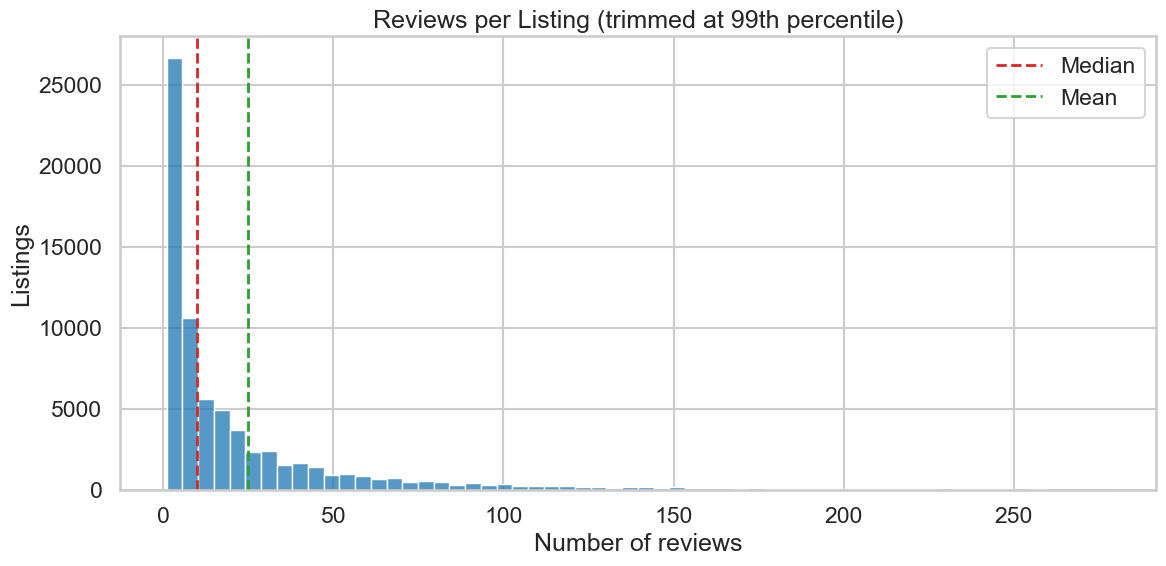

In [62]:
q99 = numbers_reviews["num_reviews"].quantile(0.99)
trimmed = numbers_reviews[numbers_reviews["num_reviews"] <= q99]

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(trimmed["num_reviews"], bins=60, color="#1f77b4", ax=ax)
ax.axvline(trimmed["num_reviews"].median(), color="#d62728", linestyle="--", linewidth=2, label="Median")
ax.axvline(trimmed["num_reviews"].mean(), color="#2ca02c", linestyle="--", linewidth=2, label="Mean")
ax.set_title("Reviews per Listing (trimmed at 99th percentile)")
ax.set_xlabel("Number of reviews")
ax.set_ylabel("Listings")
ax.legend()
plt.tight_layout()
plt.show()

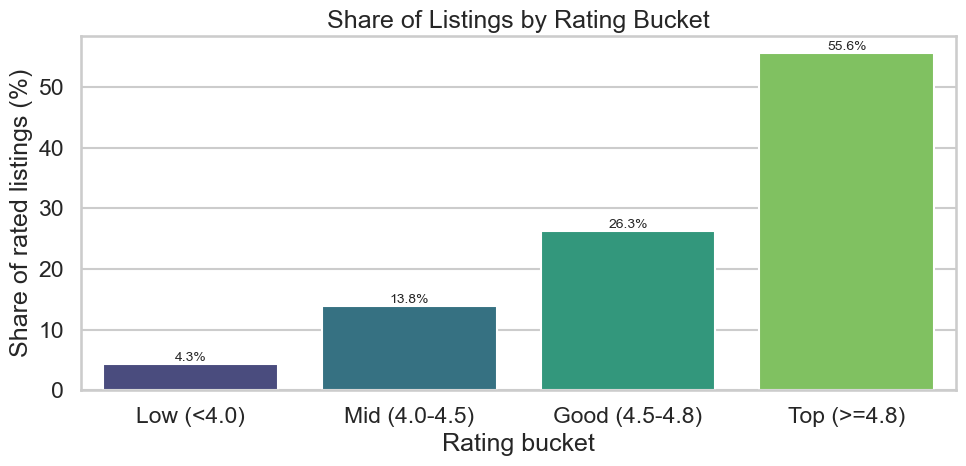

,bucket,listings,pct
0,Low (<4.0),3115,4.281846
1,Mid (4.0-4.5),10044,13.806375
2,Good (4.5-4.8),19116,26.276650
3,Top (>=4.8),40474,55.635129


In [63]:
bucket_order = ["Low (<4.0)", "Mid (4.0-4.5)", "Good (4.5-4.8)", "Top (>=4.8)"]

bucket_dist = (
    rated["rating_bucket"]
    .value_counts(dropna=False)
    .reindex(bucket_order)
    .rename_axis("bucket")
    .reset_index(name="listings")
)
bucket_dist["pct"] = bucket_dist["listings"] / bucket_dist["listings"].sum() * 100

fig, ax = plt.subplots(figsize=(10, 5))
bar = sns.barplot(data=bucket_dist, x="bucket", y="pct", hue="bucket", palette="viridis", legend=False, ax=ax)
ax.set_title("Share of Listings by Rating Bucket")
ax.set_xlabel("Rating bucket")
ax.set_ylabel("Share of rated listings (%)")

for p in bar.patches:
    h = p.get_height()
    ax.annotate(f"{h:.1f}%", (p.get_x() + p.get_width() / 2, h), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

bucket_dist

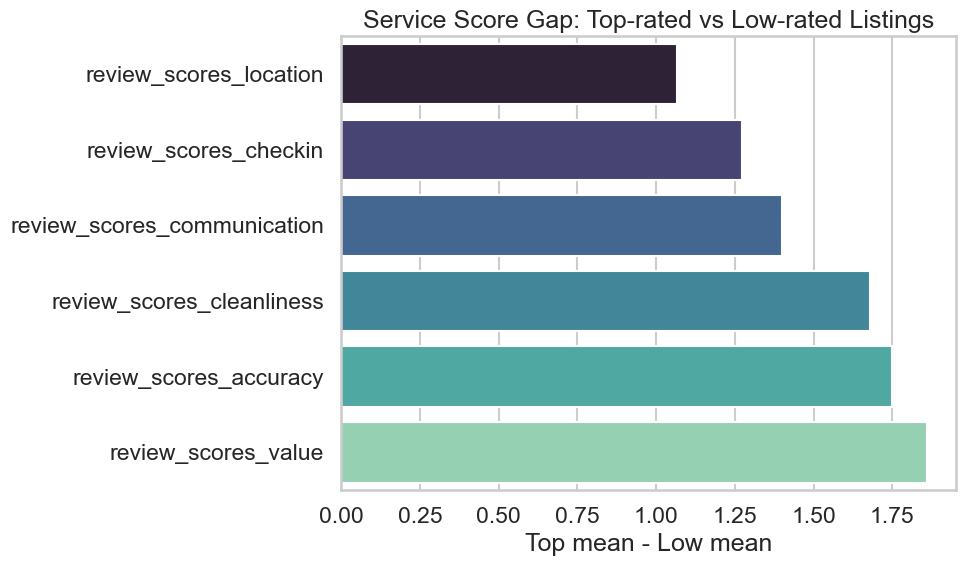

,feature,low_mean,top_mean,delta_top_minus_low
5,review_scores_location,3.786717,4.853738,1.067021
4,review_scores_checkin,3.655755,4.928858,1.273103
3,review_scores_communication,3.554679,4.955795,1.401116
1,review_scores_cleanliness,3.190931,4.868822,1.677891
2,review_scores_accuracy,3.175552,4.924552,1.748999
0,review_scores_value,2.982765,4.842229,1.859464


In [64]:
low = rated[rated["review_scores_rating"] < 4.0]
top = rated[rated["review_scores_rating"] >= 4.8]

service_cols = [
    "review_scores_value",
    "review_scores_cleanliness",
    "review_scores_accuracy",
    "review_scores_communication",
    "review_scores_checkin",
    "review_scores_location",
]

service_comp = pd.DataFrame(
    {
        "feature": service_cols,
        "low_mean": [low[c].mean() for c in service_cols],
        "top_mean": [top[c].mean() for c in service_cols],
    }
)
service_comp["delta_top_minus_low"] = service_comp["top_mean"] - service_comp["low_mean"]
service_comp = service_comp.sort_values("delta_top_minus_low", ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=service_comp,
    y="feature",
    x="delta_top_minus_low",
    hue="feature",
    palette="mako",
    legend=False,
    ax=ax,
)
ax.set_title("Service Score Gap: Top-rated vs Low-rated Listings")
ax.set_xlabel("Top mean - Low mean")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

service_comp

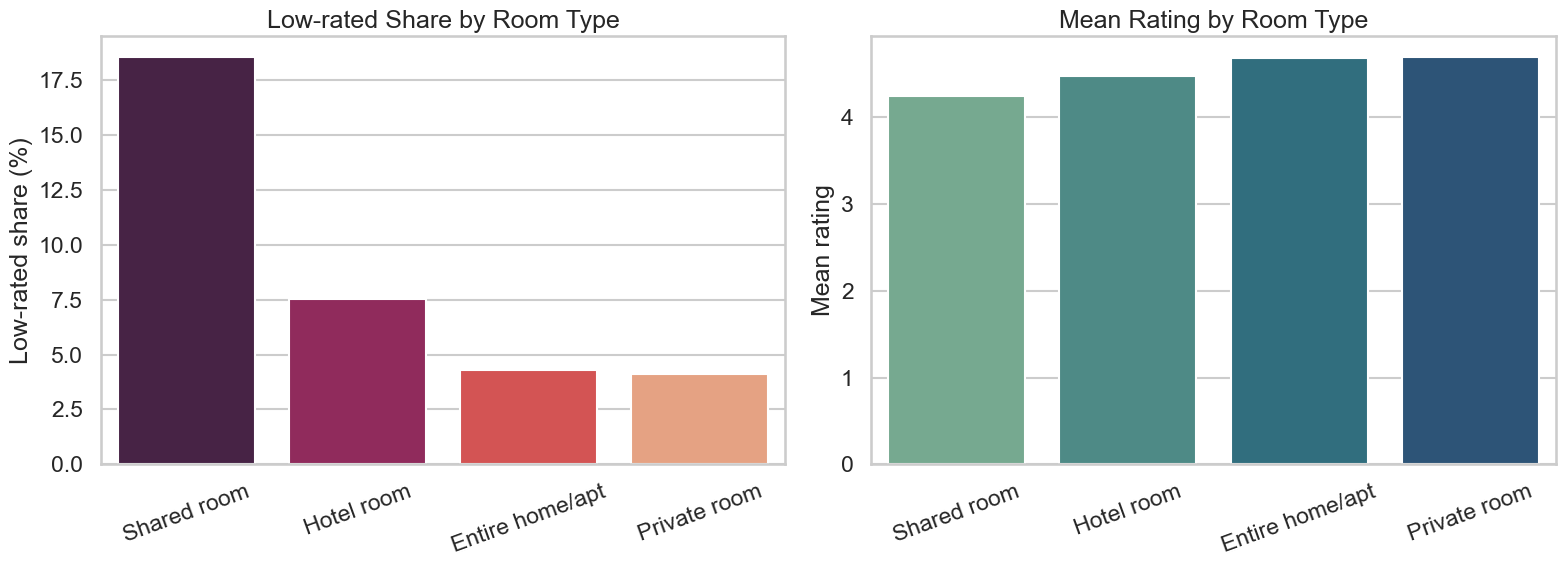

,room_type,listings,mean_rating,low_share,mean_price
3,Shared room,167,4.244790,18.562874,93.200000
1,Hotel room,93,4.468710,7.526882,442.387097
0,Entire home/apt,48904,4.682225,4.318665,225.718744
2,Private room,23585,4.693857,4.091584,117.807779


In [65]:
room_stats = (
    rated.groupby("room_type")
    .agg(
        listings=("id", "count"),
        mean_rating=("review_scores_rating", "mean"),
        low_share=("is_low", "mean"),
        mean_price=("price_num", "mean"),
    )
    .reset_index()
)
room_stats["low_share"] *= 100
room_stats = room_stats.sort_values("low_share", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=room_stats,
    x="room_type",
    y="low_share",
    hue="room_type",
    palette="rocket",
    legend=False,
    ax=axes[0],
)
axes[0].set_title("Low-rated Share by Room Type")
axes[0].set_xlabel("")
axes[0].set_ylabel("Low-rated share (%)")
axes[0].tick_params(axis="x", rotation=20)

sns.barplot(
    data=room_stats,
    x="room_type",
    y="mean_rating",
    hue="room_type",
    palette="crest",
    legend=False,
    ax=axes[1],
)
axes[1].set_title("Mean Rating by Room Type")
axes[1].set_xlabel("")
axes[1].set_ylabel("Mean rating")
axes[1].tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()

room_stats

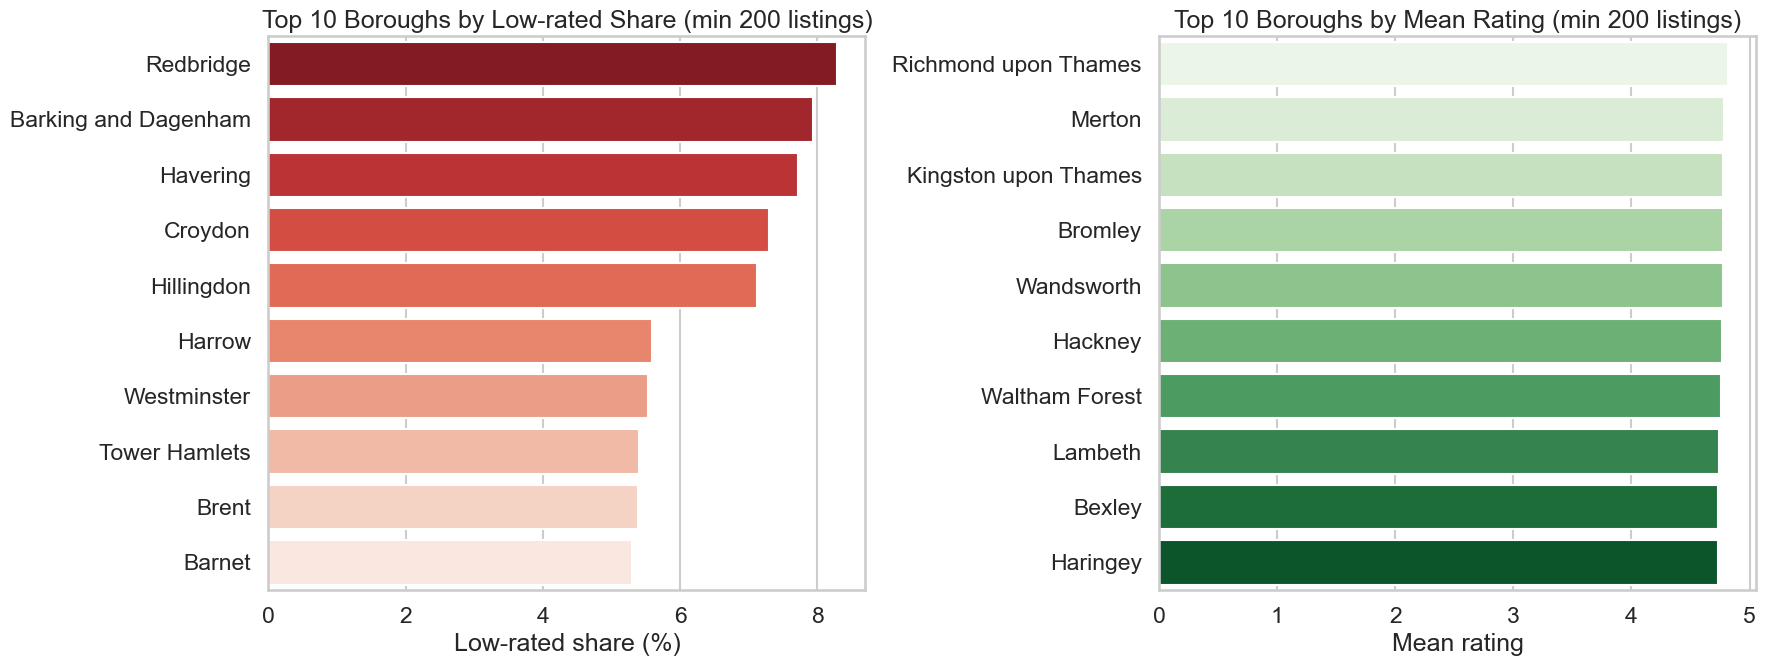

,neighbourhood_cleansed,listings,mean_rating,low_share
25,Redbridge,676,4.597500,8.284024
0,Barking and Dagenham,504,4.576369,7.936508
15,Havering,337,4.592463,7.715134
7,Croydon,1221,4.619189,7.289107
16,Hillingdon,716,4.612388,7.122905
14,Harrow,483,4.658841,5.590062
32,Westminster,8683,4.613685,5.528043
29,Tower Hamlets,5683,4.633994,5.402076
3,Brent,2231,4.668933,5.378754
1,Barnet,1776,4.655158,5.292793


In [66]:
borough_stats = (
    rated.groupby("neighbourhood_cleansed")
    .agg(
        listings=("id", "count"),
        mean_rating=("review_scores_rating", "mean"),
        low_share=("is_low", "mean"),
    )
    .reset_index()
)
borough_stats = borough_stats[borough_stats["listings"] >= 200].copy()
borough_stats["low_share"] *= 100

risk_boroughs = borough_stats.sort_values("low_share", ascending=False).head(10)
best_boroughs = borough_stats.sort_values("mean_rating", ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(
    data=risk_boroughs,
    y="neighbourhood_cleansed",
    x="low_share",
    hue="neighbourhood_cleansed",
    palette="Reds_r",
    legend=False,
    ax=axes[0],
)
axes[0].set_title("Top 10 Boroughs by Low-rated Share (min 200 listings)")
axes[0].set_xlabel("Low-rated share (%)")
axes[0].set_ylabel("")

sns.barplot(
    data=best_boroughs,
    y="neighbourhood_cleansed",
    x="mean_rating",
    hue="neighbourhood_cleansed",
    palette="Greens",
    legend=False,
    ax=axes[1],
)
axes[1].set_title("Top 10 Boroughs by Mean Rating (min 200 listings)")
axes[1].set_xlabel("Mean rating")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

risk_boroughs[["neighbourhood_cleansed", "listings", "mean_rating", "low_share"]]

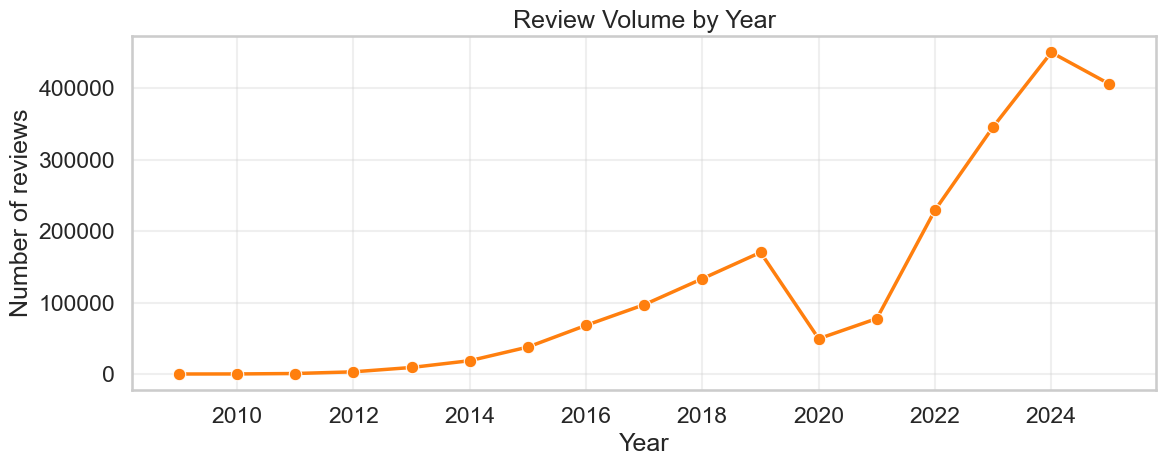

,year,reviews
9,2018,133514
10,2019,170373
11,2020,49408
12,2021,77690
13,2022,229571
14,2023,346172
15,2024,450473
16,2025,406129


In [67]:
reviews_per_year = (
    reviews.assign(date=pd.to_datetime(reviews["date"], errors="coerce"))
    .dropna(subset=["date"])
    .assign(year=lambda d: d["date"].dt.year)
    .groupby("year")
    .size()
    .reset_index(name="reviews")
)

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=reviews_per_year, x="year", y="reviews", marker="o", linewidth=2.5, color="#ff7f0e", ax=ax)
ax.set_title("Review Volume by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of reviews")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

reviews_per_year.tail(8)